In [43]:
import pandas as pd

tweets_df = pd.concat([pd.read_json('../dataset/tweet-processed.json', orient='index'), pd.read_excel('../dataset/tweet-label.xlsx').drop(['Unnamed: 0', 'raw_text'], axis=1)], axis=1)
print(tweets_df.shape)
tweets_df.head()

(4851, 13)


,raw_text,1st_clean_twitter,1st_clean_twitter_gensim,2nd_punctuation,2nd_punctuation_gensim,3rd_emoji,3rd_emoji_gensim,4th_tokenized,4th_tokenized_gensim,sentence,5_tagged,emotion,is_spam
0,cepet bgt si…. #10YearsOf5SOS,cepet bgt si…. 10YearsOf5SOS,cepet bgt si….,cepet bgt si… 10YearsOf5SOS,cepet bgt si….,cepet bgt si… 10YearsOf5SOS,cepet bgt si….,"[cepet, bgt, si…, 10YearsOf5SOS]","[cepet, bgt, si…, .]","Sentence: ""cepet bgt si… 10YearsOf5SOS"" [− T...","[cepet_PROPN, bgt_PROPN, si…_PROPN, 10YearsOf5...",s,NaN
1,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,Hallo Guys semoga kalian sehat selalu\n\nYang ...,"[Hallo, Guys, semoga, kalian, sehat, selalu, Y...","[Hallo, Guys, semoga, kalian, sehat, selalu, Y...","Sentence: ""Hallo Guys semoga kalian sehat sela...","[Hallo_PROPN, Guys_PROPN, semoga_ADV, kalian_P...",NaN,NaN
2,#10YearsOf5SOS udah 10 tahun ajaa time flies.....,10YearsOf5SOS udah 10 tahun ajaa time flies.....,udah 10 tahun ajaa time flies.. eh tapi aku b...,10YearsOf5SOS udah 10 tahun ajaa time flies e...,udah 10 tahun ajaa time flies.. eh tapi aku b...,10YearsOf5SOS udah 10 tahun ajaa time flies e...,udah 10 tahun ajaa time flies.. eh tapi aku b...,"[10YearsOf5SOS, udah, 10, tahun, ajaa, time, f...","[udah, 10, tahun, ajaa, time, flies, .., eh, t...","Sentence: ""10YearsOf5SOS udah 10 tahun ajaa ti...","[10YearsOf5SOS_ADV, udah_VERB, 10_NUM, tahun_N...",s,NaN
3,Ashton mi nene\n#BackTo2011 #10YearsOf5SOS #5...,Ashton mi nene\n BackTo2011 10YearsOf5SOS 5...,Ashton mi nene\n,Ashton mi nene\n BackTo2011 10YearsOf5SOS 5...,Ashton mi nene\n,Ashton mi nene\n BackTo2011 10YearsOf5SOS 5...,Ashton mi nene\n,"[Ashton, mi, nene, BackTo2011, 10YearsOf5SOS, ...","[Ashton, mi, nene]","Sentence: ""Ashton mi nene BackTo2011 10YearsOf...","[Ashton_PROPN, mi_PROPN, nene_PROPN, BackTo201...",NaN,NaN
4,"MYT mohegan sun, 2018 💖 #10YearsOf5SOS #5SOS h...","MYT mohegan sun, 2018 💖 10YearsOf5SOS 5SOS","MYT mohegan sun, 2018 💖",MYT mohegan sun 2018 💖 10YearsOf5SOS 5SOS,"MYT mohegan sun, 2018 💖",MYT mohegan sun 2018 10YearsOf5SOS 5SOS,"MYT mohegan sun, 2018","[MYT, mohegan, sun, 2018, 10YearsOf5SOS, 5SOS]","[MYT, mohegan, sun, ,, 2018]","Sentence: ""MYT mohegan sun 2018 10YearsOf5SOS ...","[MYT_PROPN, mohegan_PROPN, sun_PROPN, 2018_NUM...",NaN,NaN


In [44]:
tweets_df = tweets_df.drop_duplicates('3rd_emoji_gensim')

<AxesSubplot:xlabel='emotion', ylabel='Count'>

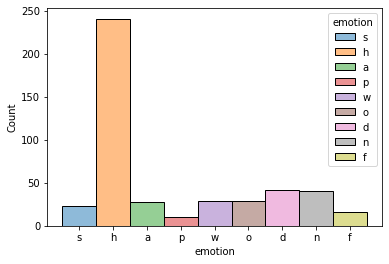

In [45]:
import seaborn as sns

sns.histplot(tweets_df, x='emotion', hue='emotion')

In [12]:
tweets_df.drop(['emotion', 'is_spam'], axis=1).to_json('../dataset/tweet-processed.json', orient='index', default_handler=str)
tweets_df[['raw_text', 'emotion', 'is_spam']].to_excel('../dataset/tweet-label.xlsx')